In [2]:
import pandas as pd

In [ ]:
%%time
#df_all=df.DataFrame()
for t in ['patent_incopat_202101_202211','patent202210','patent_incopat_202212_202312','patent202309','patent202404']:
    query=f'select 序号,`公开（公告）号`,申请号,申请日,申请人,引证申请人,被引证申请人,引证专利,专利类型,IPC主分类,`标题 (中文)` from `{t}`;'
    chunks_list = []
    for chunks in pd.read_sql_query(query, conn,chunksize=5000):
        chunks['table'] = t
        chunks_list.append(chunks)
        print(chunks.shape[0],len(chunks_list))

    df = pd.concat(chunks_list, ignore_index=True)
    df.to_csv(f'data\\patent_bridge_{t}.csv')
    #df_all = pd.concat([df_all,df], ignore_index=True)
    print(t,df.shape)
    
    del df
    del chunks_list
    gc.collect()

In [6]:
names=['patent_bridge_patent_incopat_202101_202211','patent_bridge_patent_incopat_202212_202312','patent_bridge_patent202210','patent_bridge_patent202309','patent_bridge_patent202404']

In [7]:
%%time
df_bridge=pd.DataFrame()
for n in names:
    df=pd.read_csv(f'X:\Downloads\Patent\{n}.csv')
    df_bridge=pd.concat([df_bridge,df])
    print(n,df.shape)

<timed exec>:3: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.


patent_bridge_patent_incopat_202101_202211 (8920983, 13)


<timed exec>:3: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.


patent_bridge_patent_incopat_202212_202312 (589874, 13)


<timed exec>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


patent_bridge_patent202210 (1772752, 13)
patent_bridge_patent202309 (113090, 13)
patent_bridge_patent202404 (2260240, 13)
CPU times: total: 1min 34s
Wall time: 5min 9s


In [18]:
df_bridge['申请日']=pd.to_datetime(df_bridge['申请日'])
df_bridge.sort_values('申请日',ascending=False,inplace=True)

In [22]:
df_bridge.drop_duplicates(['公开（公告）号','申请号'],keep='first',inplace=True)
df_bridge.shape

(9338426, 12)

In [24]:
df_bridge.reset_index(drop=True,inplace=True)
df_bridge

,序号,公开（公告）号,申请号,申请日,申请人,引证申请人,被引证申请人,引证专利,专利类型,IPC主分类,标题 (中文),table
0,2260128,EU0150530750001S,EU015053075,2024-03-07,Shenzhen Chip Optech Co Ltd,NaN,NaN,NaN,外观设计,NaN,NaN,patent202404
1,2260127,IN202448016242A,IN202448016242,2024-03-07,Zhejiang Hanmingbo New Energy Co Ltd,NaN,NaN,NaN,发明申请,H02J7/02,用于为电动汽车充电的系统和方法,patent202404
2,2260125,EU0150525020002S,EU015052502,2024-03-04,Minami Acoustics Limited,NaN,NaN,NaN,外观设计,NaN,耳机,patent202404
3,2260123,CN220710520U,CN202420403622.8,2024-03-04,长安绿电科技有限公司,NaN,NaN,NaN,实用新型,H01M50/244,可拆卸式电池模块,patent202404
4,2260124,EU0150525020001S,EU015052502,2024-03-04,Minami Acoustics Limited,NaN,NaN,NaN,外观设计,NaN,耳机,patent202404
...,...,...,...,...,...,...,...,...,...,...,...,...
9338421,2260236,PH12021551776A1,PH12021551776,NaT,Hangzhou Dac Biotech Co Ltd,NaN,NaN,NaN,发明申请,A61K47/50,鹅膏蕈毒素与分支接头的缀合物,patent202404
9338422,2260237,PH12021500050A1,PH12021500050,NaT,Hangzhou Dac Biotech Co Ltd,NaN,NaN,NaN,发明申请,A61K47/00,细胞毒性剂与具有分支接头的细胞结合分子的缀合物,patent202404
9338423,2260238,PH12021551878A1,PH12021551878,NaT,Sansure Biotech Inc,NaN,NaN,NaN,发明申请,C12Q1/68,核酸释放剂、核酸PCR扩增方法及PCR扩增试剂盒,patent202404
9338424,2260239,PH12021552622A1,PH12021552622,NaT,Shanghai Junshi Biosciences Co Ltd,NaN,NaN,NaN,发明申请,A61K39/395,抗PD-1抗体在制备治疗实体瘤药物中的应用,patent202404


In [ ]:
df_bridge.to_csv('data\patent_bridge_last.csv')

In [28]:
import pickle
with open('data\先进制造企业名称.pkl', 'rb') as file:
    co=pickle.load(file)
len(co)

7370

In [29]:
co_data=df_bridge['申请人'].str.split(';',expand=True).stack().str.strip().reset_index(level=1,drop=True).rename('Co')
co_data.isin(co).sum()#先进制造

1202961

In [30]:
patent_mask=co_data.isin(co)
patent_co=df_bridge.loc[patent_mask[patent_mask].index]
patent_co['Co']=co_data[patent_mask]
patent_co.table.value_counts()

table
patent202404                    678286
patent202210                    387522
patent_incopat_202101_202211    115708
patent_incopat_202212_202312     20396
patent202309                      1049
Name: count, dtype: int64

In [32]:
patent_co['Co'].value_counts()

Co
珠海格力电器股份有限公司      98919
中兴通讯股份有限公司        85880
美的集团股份有限公司        70569
京东方科技集团股份有限公司     48646
海尔智家股份有限公司        27862
                  ...  
湖南楚微半导体科技有限公司         1
深圳易通技术股份有限公司          1
上海德门信息技术有限公司          1
云南恒光科技股份有限公司          1
苏州海中航空科技股份有限公司        1
Name: count, Length: 7370, dtype: int64

In [33]:
patent_co.to_csv('data\先进制造企业专利_bridge.csv')

In [3]:
patent_co=pd.read_csv('data\patent_co_1922_16k_202403.csv',index_col=0)

In [72]:
patent_co=pd.read_csv('data\patent_co_1953_16k_202407.csv',usecols=['工商全称','公开（公告）号','申请号','申请日','申请人','引证申请人','被引证申请人','引证专利','专利类型','IPC主分类','标题 (中文)','table_name','行业'])
patent_co.shape

(1952765, 13)

In [74]:
patent_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952765 entries, 0 to 1952764
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   工商全称        object
 1   标题 (中文)     object
 2   申请人         object
 3   申请日         object
 4   申请号         object
 5   公开（公告）号     object
 6   专利类型        object
 7   IPC主分类      object
 8   引证专利        object
 9   引证申请人       object
 10  被引证申请人      object
 11  table_name  object
 12  行业          object
dtypes: object(13)
memory usage: 193.7+ MB


In [75]:
#patent_co=patent_co[['工商全称','公开（公告）号','申请号','申请日','申请人','引证申请人','被引证申请人','引证专利','专利类型','IPC主分类','标题 (中文)','table_name','行业']].copy()
patent_co['申请日']=pd.to_datetime(patent_co['申请日'])
patent_co['申请年']=patent_co['申请日'].dt.year
patent_co.sort_values(['工商全称','申请日'],ascending=True,inplace=True)
patent_co.reset_index(drop=True,inplace=True)
patent_co

,工商全称,标题 (中文),申请人,申请日,申请号,公开（公告）号,专利类型,IPC主分类,引证专利,引证申请人,被引证申请人,table_name,行业,申请年
0,Dexta Robotics,手外骨骼力反馈系统,Dexta Robotics,2016-05-16,US15155220,US20160259417A1,发明申请,G06F3/01,US20160278947A1; US20100041521A1; US2010013432...,Louis B Rosenberg; Bernard G Jackson; Chris De...,Shenzhen Dexta Robotics Co Ltd; Siemens Aktien...,patent202404,先进制造,2016
1,Dexta Robotics,手动外骨骼力反馈系统,Dexta Robotics,2016-05-16,US15155220,US10423227B2,发明授权,G08B6/00,EP2345951A2; US7138976B1; US7862522B1; US20100...,Virtual Technologies Inc; Axonvr Corporation; ...,Gary Poillucci; Microsoft Technology Licensing...,patent202404,先进制造,2016
2,Dexta Robotics,手动外骨骼力反馈系统,Dexta Robotics,2019-09-13,US16570971,US20200050269A1,发明申请,G06F3/01,US9072616B2; US20080300521A1; US20150065831A1;...,James Jay Martin; Stefan Schulz; Chris Demetri...,Rohm Co Ltd; Finewell Co Ltd; 北京海益同展信息科技有限公司; ...,patent202404,先进制造,2019
3,Dexta Robotics,手动外骨骼力反馈系统,Dexta Robotics,2019-09-13,US16570971,US10817056B2,发明授权,G06F3/0338,US9104271B1; US20110234483A1; US20080300521A1;...,Gifu University; Kawasaki Haruhisa; Endo Takah...,Southeast University; Neurolutions Inc; Shenzh...,patent202404,先进制造,2019
4,TCL华星光电技术有限公司,UV固化粉末光阻组合物及其制作方法、彩膜基板的制作方法,TCL华星光电技术有限公司,2017-07-07,CN201910913913.5,CN110658679B,发明授权,G03F7/004,CN101523289A; JP2005320451A; CN1608231A; JP201...,Mitsubishi Rayon Co; 西巴控股有限公司; DSMIP财产有限公司; Bo...,NaN,patent202404,先进制造,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952760,龙芯中科技术股份有限公司,软件包卸载管理方法、装置、电子设备及存储介质,龙芯中科技术股份有限公司,2024-01-15,CN202410057789.8,CN117573234A,发明申请,G06F9/445,NaN,NaN,NaN,patent202404,先进制造,2024
1952761,龙芯中科技术股份有限公司,内存管理方法、装置、电子设备及可读存储介质,龙芯中科技术股份有限公司,2024-01-29,CN202410124208.8,CN117648200A,发明申请,G06F9/50,NaN,NaN,NaN,patent202404,先进制造,2024
1952762,龙芯中科技术股份有限公司,栈空间防护方法、电子设备、存储介质及计算机程序产品,龙芯中科技术股份有限公司,2024-01-30,CN202410129434.5,CN117688552A,发明申请,G06F21/51,NaN,NaN,NaN,patent202404,先进制造,2024
1952763,龙芯中科技术股份有限公司,设备加载方法、装置、电子设备及存储介质,龙芯中科技术股份有限公司,2024-02-01,CN202410146942.4,CN117667241A,发明申请,G06F9/4401,NaN,NaN,NaN,patent202404,先进制造,2024


In [9]:
patent_co.table_name.value_counts()

table_name
patent202404                    1121649
patent202210                     573414
patent_incopat_202101_202211     166324
patent202309                      33005
patent_incopat_202212_202312      27629
Name: count, dtype: int64

In [64]:
patent_co.table_name.value_counts()

table_name
patent202404                    1098472
patent202210                     559097
patent_incopat_202101_202211     157822
patent202407                     111243
patent_incopat_202212_202312      25156
patent202309                        975
Name: count, dtype: int64

In [10]:
patent_co['行业'].value_counts()

行业
先进制造    1203178
传统制造     429433
医疗健康     211092
金融        78257
Name: count, dtype: int64

In [76]:
patent_co['行业'].value_counts()

行业
先进制造    1203317
传统制造     429446
医疗健康     211155
金融       108786
Name: count, dtype: int64

In [66]:
patent_co=patent_co[patent_co['行业']=='医疗健康'].rename(columns={'工商全称':'Co'}).copy()
patent_co.shape

(211155, 14)

In [77]:
patent_co=patent_co[patent_co['行业']=='金融'].rename(columns={'工商全称':'Co'}).copy()
patent_co.shape

(108786, 14)

In [99]:
patent_co.Co.nunique()

846

In [78]:
patent_co['申请年']=patent_co['申请日'].dt.year
patent_co.sort_values(['Co','申请日'],ascending=True,inplace=True)
patent_co.reset_index(drop=True,inplace=True)
patent_co

,Co,标题 (中文),申请人,申请日,申请号,公开（公告）号,专利类型,IPC主分类,引证专利,引证申请人,被引证申请人,table_name,行业,申请年
0,TCL科技集团财务有限公司,数据共享联盟链中智能合约的上链表决方法及系统,TCL科技集团财务有限公司,2020-04-21,CN202010319363.7,CN111475579B,发明授权,G06F16/27,NaN,NaN,NaN,patent202407,金融,2020
1,万向信托股份公司,平板电脑的图形用户界面(档案采集双录APP),万向信托股份公司,2019-02-27,CN201930077880.6,CN305427085S,外观设计,NaN,NaN,NaN,NaN,patent202407,金融,2019
2,万向信托股份公司,手机的图形用户界面(尽调APP),万向信托股份公司,2019-02-27,CN201930077885.9,CN305366911S,外观设计,NaN,NaN,NaN,NaN,patent202407,金融,2019
3,万向信托股份公司,手机的客户业务查询及办理图形用户界面,万向信托股份公司,2020-02-17,CN202030056756.4,CN305956817S,外观设计,NaN,NaN,NaN,NaN,patent202407,金融,2020
4,万向信托股份公司,平板电脑的移动展业图形用户界面,万向信托股份公司,2020-02-17,CN202030052976.X,CN305947628S,外观设计,NaN,NaN,NaN,NaN,patent202407,金融,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108781,鹏元征信有限公司,一种加密方法、解密方法、存储介质及终端设备,鹏元征信有限公司,2020-09-10,CN202010947904.0,CN112052469A,发明申请,G06F21/60,WO2014183671A1; US20200389302A1; CN109587276A,中钞信用卡产业发展有限公司杭州区块链技术研究院; Orange; Tianjin Surse...,NaN,patent202407,金融,2020
108782,鹏元征信有限公司,一种加密方法、解密方法、存储介质及终端设备,鹏元征信有限公司,2020-09-29,CN202011046741.5,CN112165490A,发明申请,H04L29/06,CN111431713A; CN107181589A; JP2005101742A; CN1...,矩阵元技术(深圳)有限公司; 北京奇艺世纪科技有限公司; Mebius Corp; 财付通支...,辽宁工控科技有限公司; 长威信息科技发展股份有限公司; 沈阳邦粹科技有限公司; 重庆富民银行...,patent202407,金融,2020
108783,鹏元征信有限公司,一种风险监控方法、装置、存储介质及计算机设备,鹏元征信有限公司,2020-11-05,CN202011223381.1,CN112419041A,发明申请,G06Q40/02,CN109636578A; CN109636564A,平安科技(深圳)有限公司,深圳高灯计算机科技有限公司; 义乌新型智慧城市运营有限公司; 上海钢银科技发展有限公司; 支...,patent202407,金融,2020
108784,鹏元征信有限公司,一种数据授权方法、装置、授权平台及存储介质,鹏元征信有限公司,2021-02-04,CN202110154618.3,CN112883351A,发明申请,G06F21/32,US20160248756A1; CN111597538A; US20200259643A1...,上海瀚之友信息技术服务有限公司; 平安科技(深圳)有限公司; 平安国际智慧城市科技股份有限公...,珠海星纪魅族信息技术有限公司; 联仁健康医疗大数据科技股份有限公司; 国网安徽省电力有限公司...,patent202407,金融,2021


In [42]:
patent_co.count()

序号         1202961
公开（公告）号    1202961
申请号        1202961
申请日        1202961
申请人        1202961
引证申请人       483818
被引证申请人      363217
引证专利        484363
专利类型       1202961
IPC主分类     1111266
标题 (中文)    1202961
table      1202961
Co         1202961
申请年        1202961
dtype: int64

Step 1: 在申请人（即公司层面）层面，生成每一个自然年该家公司在过去五年里面（不包括当年）所有申请的专利的引用专利的公开号+该公司过去所有已有专利的公开号的list=》最终生成的事每一家公司，每一年的一个过去五年引用专利加自己已有专利的公开号的字符串(假设变量名称为existing_knowledge)。  
Step 2: 在每条专利层面，看该条专利的引证的专利公开号与其对应的申请人的existing_knowledge的专利公开号的list 的重合程度，计算比例（也就是重合的比例/该条专利所有的引用专利的数量）(假设变量名称为explorative percentage   )
Step 3: 在申请人层面，生成每一个自然年该公司所有申请的专利中，existing percentage>80%的专利占比（占当年所有申请专利的比例）（假设该变量名称为explorativ  ）


In [79]:
co_year=patent_co.groupby('Co')['申请年'].apply(lambda x:x.unique()).explode().reset_index()#patent_co.drop_duplicates(subset=['Co', '申请年']).reset_index(drop=True)
co_year

,Co,申请年
0,TCL科技集团财务有限公司,2020
1,万向信托股份公司,2019
2,万向信托股份公司,2020
3,万向信托股份公司,2021
4,万向信托股份公司,2022
...,...,...
3233,鹏元征信有限公司,2018
3234,鹏元征信有限公司,2019
3235,鹏元征信有限公司,2020
3236,鹏元征信有限公司,2021


In [20]:
co_year.Co.value_counts()

Co
漳州片仔癀药业股份有限公司       25
深圳迈瑞生物医疗电子股份有限公司    24
江苏康缘药业股份有限公司        24
江苏恒瑞医药股份有限公司        24
山东新华医疗器械股份有限公司      24
                    ..
成都深泉科技有限公司           1
成都赛恩贝生物科技有限公司        1
成都香晨科技有限责任公司         1
承德天原药业有限公司           1
龙晖药业有限公司             1
Name: count, Length: 3613, dtype: int64

In [80]:
patent_co['引证专利_A']=patent_co['引证专利'].dropna().str.split(';').apply(lambda x: [i.strip() for i in x])

In [21]:
def filter_id(row):
   return  patent_co.loc[(patent_co['Co']==row['Co'])&(patent_co['申请年'] < row.申请年),'公开（公告）号'].dropna().str.strip().to_list()
co_year.loc[:10].apply(filter_id,axis=1)

0                                                    []
1     [CN105477559B, CN105535895B, CN105560984B, CN1...
2     [CN105477559B, CN105535895B, CN105560984B, CN1...
3                                                    []
4                                                    []
5     [CN206714857U, CN206587072U, CN206612864U, CN1...
6     [CN206714857U, CN206587072U, CN206612864U, CN1...
7     [CN206714857U, CN206587072U, CN206612864U, CN1...
8     [CN206714857U, CN206587072U, CN206612864U, CN1...
9                                                    []
10    [CN305625706S, CN305437799S, CN305439100S, CN3...
dtype: object

In [22]:
def filter_citation(row,y=5):
    filter_value=patent_co.loc[(patent_co['Co']==row['Co'])&((y <= 0) | (patent_co['申请年'] >= row.申请年-y))&(patent_co['申请年'] < row.申请年),'引证专利_A'].dropna()
    if filter_value.empty:
        return []
    return filter_value.explode().to_list()# filter_value.str.split(';').explode().str.strip().to_list()
co_year.loc[:10].apply(filter_citation,axis=1)

0                                                    []
1     [CN101229317A, CN1823776A, CN1943558A, CN15595...
2     [CN101229317A, CN1823776A, CN1943558A, CN15595...
3                                                    []
4                                                    []
5     [CN105105890A, CN103417313B, CN105105890A, CN1...
6     [CN105105890A, CN103417313B, CN105105890A, CN1...
7     [KR100439077B1, CN107932283A, CN108004883A, CN...
8                                                    []
9                                                    []
10    [CN109889551A, CN106230995A, CN108933757A, US9...
dtype: object

In [88]:
#当年申请专利
patent_co.groupby(['Co', '申请年'])['公开（公告）号'].apply(lambda x:x.str.strip().to_list()).reset_index()#transform

,Co,申请年,公开（公告）号
0,Dexta Robotics,2016,"[US20160259417A1, US10423227B2]"
1,Dexta Robotics,2019,"[US20200050269A1, US10817056B2]"
2,TCL华星光电技术有限公司,2017,"[CN110673439B, CN110658679B, CN107868666B, CN1..."
3,TCL华星光电技术有限公司,2018,"[CN108693669B, CN109212815B]"
4,TCL华星光电技术有限公司,2019,"[CN110349524B, CN110070819B, CN110348071B, CN1..."
...,...,...,...
39013,龙芯中科技术股份有限公司,2020,"[CN111290759B, CN113296720A, CN113495611A, CN1..."
39014,龙芯中科技术股份有限公司,2021,"[CN112732361A, CN112732361B, CN114974391A, CN1..."
39015,龙芯中科技术股份有限公司,2022,"[CN307402110S, CN116483749A, CN217133667U, CN2..."
39016,龙芯中科技术股份有限公司,2023,"[CN116089007A, CN116151181A, CN116054817A, CN2..."


In [81]:
%%time
co_year['过去已有专利']=co_year.apply(filter_id,axis=1)
co_year['过去五年引用专利']=co_year.apply(filter_citation,axis=1)

CPU times: total: 49.7 s
Wall time: 49.8 s


In [83]:
co_year['existing_knowledge']=co_year.apply(lambda row:row['过去已有专利']+row['过去五年引用专利'], axis=1)

In [26]:
import numpy as np

In [32]:
def match_explorative(row):
    if not isinstance(row['引证专利_A'], list) or len(row['引证专利_A']) == 0:
        return 0
    filter_value=co_year.loc[(co_year['Co']==row['Co'])&(co_year['申请年'] == row.申请年),'existing_knowledge'].dropna()
    if filter_value.empty:
        return np.nan
    return len(set(row['引证专利_A'])&set(filter_value.values[0]))/len(row['引证专利_A'])
patent_co.iloc[:10].apply(match_explorative,axis=1)

3977    0.0
3978    0.0
3979    0.0
3980    0.0
3981    0.0
3982    0.0
3983    0.0
3984    0.0
3985    0.0
3986    0.0
dtype: float64

In [84]:
%%time
patent_co['explorative_percentage']=patent_co.apply(match_explorative,axis=1)

CPU times: total: 1min 19s
Wall time: 1min 19s


{'whiskers': [<matplotlib.lines.Line2D at 0x258324a77f0>,
 'caps': [<matplotlib.lines.Line2D at 0x258324a7d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x258324a7550>],
 'medians': [<matplotlib.lines.Line2D at 0x258339432b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25833943550>],
 'means': []}

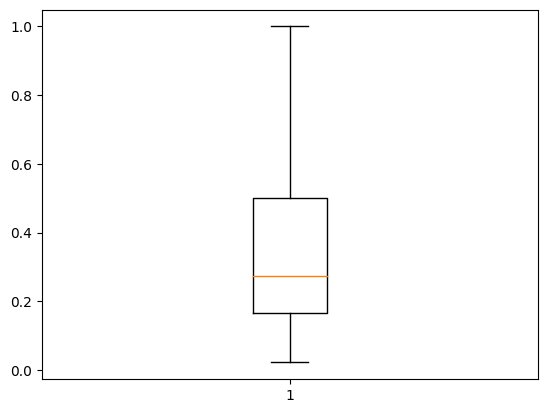

In [122]:
import matplotlib.pylab as plt
plt.boxplot(patent_co['explorative_percentage'].replace(0,np.nan).dropna())

In [85]:
explorative_ratio =patent_co.groupby(['Co', '申请年'])['explorative_percentage'].apply(lambda x:(x>0.8).sum()/len(x)).reset_index().rename(columns={'explorative_percentage':'explorative'})
co_year = co_year.merge(explorative_ratio, on=['Co', '申请年'], how='left')

In [135]:
(co_year['explorative']>0).sum(),co_year['explorative'].count()

(1981, 39018)

{'whiskers': [<matplotlib.lines.Line2D at 0x25831ade460>,
 'caps': [<matplotlib.lines.Line2D at 0x25831ade9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25831ade1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x25831adeee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2582d0421c0>],
 'means': []}

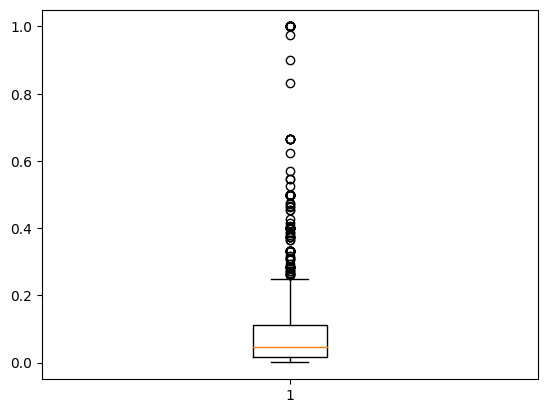

In [132]:
plt.boxplot(co_year['explorative'].replace(0,np.nan).dropna())

基于ipc分类号计算  
企业每年申请获批的专利数中，与前5年相比，跨技术大类的专利数记为突破性创新专利；与前5年相比，同一技术大类内的专利，记为渐进性专利。  
技术大类的区分标准：发明和实用新型取主分类号前3位字符；外观设计取前4位字符。  

度量方式：
Step 1: 在申请人（即公司层面）层面，生成每一个自然年该家公司在过去五年里面（不包括当年）所有申请的专利的IPC主分类号的类型list（记为tech_category）   。
Step 2: 在每条专利层面，看该条专利的IPC主分类号是否与该申请人的tech_category有重合，新生成一个字段为jianjin_patent，若有重合则标记为1，否则为   0。
Step 3: 在申请人层面，生成每一个自然年该公司所有申请的专利中，jianjin_patent的数量（记为jianjin_patent_n   m）


In [159]:
patent_co['专利类型'].value_counts()

专利类型
发明申请    510168
实用新型    372174
发明授权    228927
外观设计     91692
Name: count, dtype: int64

In [164]:
patent_co.groupby('专利类型')['IPC主分类'].count()

专利类型
发明授权    228927
发明申请    510166
外观设计         0
实用新型    372173
Name: IPC主分类, dtype: int64

In [86]:
patent_co['技术大类']=np.where(patent_co['专利类型']=='外观设计',patent_co['IPC主分类'].str[:4],patent_co['IPC主分类'].str[:3])
patent_co['技术大类'].value_counts()

技术大类
G06    75768
H04    16462
G07     3102
G10     1494
G16      481
       ...  
F28        1
F42        1
C10        1
A23        1
C11        1
Name: count, Length: 86, dtype: int64

In [150]:
(patent_co['技术大类']=='').sum(),patent_co['技术大类'].isna().sum()

(0, 91695)

In [161]:
patent_co['技术大类'].str.len().value_counts()

技术大类
3.0    1111266
Name: count, dtype: int64

In [36]:
def filter_ipclass(row,y=5):
    return patent_co.loc[(patent_co['Co']==row['Co'])&((y <= 0) | (patent_co['申请年'] >= row.申请年-y))&(patent_co['申请年'] < row.申请年),'技术大类'].dropna().to_list() #pd.notna(item) and item != ''
co_year.iloc[:10].apply(filter_ipclass,axis=1)

0                                                   []
1             [A61, A61, A61, A61, A61, A61, A61, A61]
2    [A61, A61, A61, A61, A61, A61, A61, A61, C07, ...
3                                                   []
4                                                   []
5                       [A61, A61, A61, A61, A61, A61]
6                  [A61, A61, A61, A61, A61, A61, B24]
7                            [B24, A61, A61, A61, A61]
8                  [A61, A61, A61, A61, A41, A61, A41]
9                                                   []
dtype: object

In [87]:
%%time
co_year['tech_category']=co_year.apply(filter_ipclass, axis=1)

CPU times: total: 25 s
Wall time: 25 s


In [88]:
def match_overlap(row):##patent_co.groupby(['Co', '申请年'])['tech_category']
    filter_value=co_year.loc[(co_year['Co']==row['Co'])&(co_year['申请年'] == row.申请年),'tech_category'].dropna()
    if not filter_value.empty and row['技术大类'] in filter_value.values[0]:
        return 1
    return 0
patent_co.iloc[:10].apply(match_overlap, axis=1)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [89]:
%%time
patent_co['jianjin_patent']=patent_co.apply(match_overlap, axis=1)

CPU times: total: 2min 12s
Wall time: 2min 12s


In [90]:
jianjin_ratio =patent_co.groupby(['Co', '申请年'])['jianjin_patent'].sum().reset_index().rename(columns={'jianjin_patent': 'jianjin_patent_num'})
co_year = co_year.merge(jianjin_ratio, on=['Co', '申请年'], how='left')

In [211]:
co_year['jianjin_patent_num'].describe()

count    39018.000000
mean        24.706007
std        251.181010
min          0.000000
25%          0.000000
50%          3.000000
75%         11.000000
max      15603.000000
Name: jianjin_patent_num, dtype: float64

In [212]:
co_year[co_year['jianjin_patent_num']==15603]

,Co,申请年,过去已有专利,过去五年引用专利,existing_knowledge,explorative,tech_category,当年申请专利,jianjin_patent_num
33276,珠海格力电器股份有限公司,2020,"[CN1118043A, CN2202815Y, CN2201504Y, CN3035099...","[CN202660642U, CN203571894U, CN104236044A, CN8...","[CN1118043A, CN2202815Y, CN2201504Y, CN3035099...",0.003796,"[F24, F24, F24, F24, F24, B03, F04, F04, F04, ...","[CN211400161U, CN111156659A, CN111178982A, CN1...",15603


{'whiskers': [<matplotlib.lines.Line2D at 0x2583476f7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2583321abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2583289f340>],
 'medians': [<matplotlib.lines.Line2D at 0x2583321a040>],
 'fliers': [<matplotlib.lines.Line2D at 0x25834768490>],
 'means': []}

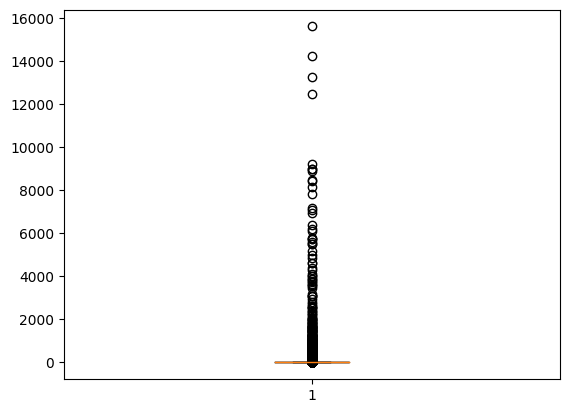

In [189]:
plt.boxplot(co_year['jianjin_patent_num'].replace(0,np.nan).dropna())

In [91]:
ids_year=patent_co.groupby(['Co', '申请年'])['公开（公告）号'].apply(lambda x:x.str.strip().to_list()).reset_index().rename(columns={'公开（公告）号': '当年申请专利'})
co_year = co_year.merge(ids_year, on=['Co', '申请年'], how='left')

In [205]:
co_year.loc[co_year['jianjin_patent_num']==15603,'当年申请专利'].apply(len)

33276    16331
Name: 当年申请专利, dtype: int64

In [92]:
patent_co['Co'].value_counts()

Co
中国银行股份有限公司           14839
中国建设银行股份有限公司         12267
建信金融科技有限责任公司          8189
中国农业银行股份有限公司          4852
平安银行股份有限公司            4697
                     ...  
开鑫科技有限公司                 1
成都市道融世纪信息技术服务有限公司        1
成都银行股份有限公司               1
易生金服控股集团有限公司             1
齐鲁银行股份有限公司               1
Name: count, Length: 846, dtype: int64

In [186]:
patent_co.drop(columns='引证专利_A').to_csv('data\先进制造企业专利_探索性.csv')

In [43]:
patent_co.drop(columns='引证专利_A').to_csv('data\医疗健康企业专利_探索性.csv')

In [93]:
patent_co.drop(columns='引证专利_A').to_csv('data\金融企业专利_探索性.csv')

In [215]:
co_year.to_pickle('data\先进制造企业_每年探索性专利.pkl')

In [45]:
co_year.to_pickle('data\医疗健康企业_每年探索性专利.pkl')

In [94]:
co_year.to_pickle('data\金融企业_每年探索性专利.pkl')

In [214]:
co_year.columns

Index(['Co', '申请年', '过去已有专利', '过去五年引用专利', 'existing_knowledge', 'explorative',
       'tech_category', '当年申请专利', 'jianjin_patent_num'],
      dtype='object')

In [225]:
co_year[['Co','申请年','explorative','jianjin_patent_num']].to_excel('data\先进制造企业_每年探索性专利.xlsx')

In [47]:
co_year[['Co','申请年','explorative','jianjin_patent_num']].to_excel('data\医疗健康企业_每年探索性专利.xlsx')

In [95]:
co_year[['Co','申请年','explorative','jianjin_patent_num']].to_excel('data\金融企业_每年探索性专利.xlsx')

In [48]:
co_year_1=co_year.copy()
co_year_1['过去已有专利']=co_year_1['过去已有专利'].apply(lambda x: ','.join(set(x)))
co_year_1['过去五年引用专利']=co_year_1['过去五年引用专利'].apply(lambda x: ','.join(set(x)))
co_year_1['当年申请专利']=co_year_1['当年申请专利'].apply(lambda x: ','.join(set(x)))
co_year_1['existing_knowledge']=co_year_1['existing_knowledge'].apply(lambda x: ','.join(set(x)))
co_year_1['tech_category']=co_year_1['tech_category'].apply(lambda x: ','.join(set(x)))

In [49]:
co_year_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Co                  18628 non-null  object 
 1   申请年                 18628 non-null  object 
 2   过去已有专利              18628 non-null  object 
 3   过去五年引用专利            18628 non-null  object 
 4   existing_knowledge  18628 non-null  object 
 5   explorative         18628 non-null  float64
 6   tech_category       18628 non-null  object 
 7   jianjin_patent_num  18628 non-null  int64  
 8   当年申请专利              18628 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [223]:
co_year_1.to_csv('data\先进制造企业_每年探索性专利_去重.csv')

In [50]:
co_year_1.to_csv('data\医疗健康企业_每年探索性专利_去重.csv')

In [ ]:
import calendar
def add_month(srcDate, addMonths):
    month = srcDate.month - 1 -addMonths
    year = int(srcDate.year + month / 12)
    month = month % 12 + 1
    day = min(srcDate.day, calendar.monthrange(int(year), int(month))[1])
    return srcDate.replace(year=year, month=month, day=day)
###加入unique之后会有一个numpy，就不能计算了，所以trd_month 的trdmnt_month自身需要drop_duplicates
trd_month=trd_month.drop_duplicates(subset=['Trdmnt_month'],keep='first')
def patent_agg(df):
    return '; '.join(df.values)

connectionreturn=pd.DataFrame()

for trade_month in trd_month['Trdmnt_month'][:-6]:
    start_month=add_month(trade_month, 60)
    start_month_return=add_month(trade_month, 1)
    end_month=trade_month
    initial_patent_2=initial_patent_1[(initial_patent_1['apply_date']>=start_month)&(initial_patent_1['apply_date']<=end_month)]
    patent_return_list=patent_company_list_2[(patent_company_list_2['Trdmnt_1']==end_month)]

    union_set_patent_return=set(initial_patent_2['公司全称'].astype(int).unique())&set(patent_return_list['Stkcd'].astype(int).unique())
    print(trade_month,len(union_set_patent_return),sep='-')
    patent_return_list_2=patent_return_list[patent_return_list['公司全称'].astype(int).isin(union_set_patent_return)]
    initial_patent_2=initial_patent_2[initial_patent_2['公司全称'].astype(int).isin(union_set_patent_return)]
    
    # IPC字段先加总（因为一个公司有多个时间点，多个专利）
    
    df = initial_patent_2.groupby(by='公司全称')['IPC主分类'].agg(patent_agg).reset_index()
    df_tmp=df['IPC主分类'].str.split('; ',expand=True)
    df_tmp=df_tmp.stack()
    df_tmp = df_tmp.reset_index(level=1,drop=True)
    df_tmp.name='IPC主分类'
    df_new = df.drop(['IPC主分类'], axis=1).join(df_tmp).reset_index().drop(columns='index')
    df_new['IPC_class']=df_new['IPC主分类'].map(lambda x:x[:3])
    
    df_new_1=df_new.groupby(['公司全称','IPC_class']).count().reset_index()
    df_new_2= df_new_1.pivot(index='公司全称', columns='IPC_class', values='IPC主分类').fillna(0)
    df_new_2=df_new_2.sort_values(by='公司全称')
    ###计算分母
    div_tech=np.sqrt((df_new_2.values*df_new_2.values).sum(axis=1))
    div_tech_1=div_tech[:,np.newaxis]
    denominator_tech=np.dot(div_tech_1,div_tech_1.T)

    ###计算分子
    numerator_tech=np.dot(df_new_2.values,df_new_2.values.T)
    numerator_tech_1=numerator_tech
    numerator_tech_1[np.eye(len(numerator_tech_1[0]),dtype=bool)]=0
    ###计算tech-closeness
    closeness=numerator_tech_1/denominator_tech

每一年，每家公司，基于其前5年的IPC分类的每一类专利的数量向量，计算与其他公司的IPC分类类别的余弦相似度，最后也是构成一个和technet一样的每一年的矩阵
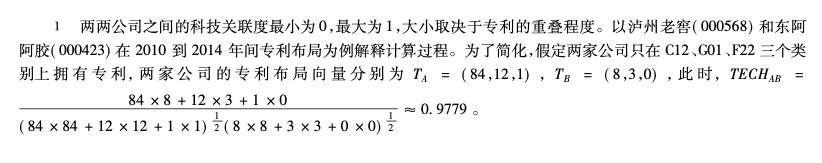

In [233]:
patent_co.技术大类.value_counts()

技术大类
H04    156343
H01    150212
G06    106606
F24     70153
G01     68120
        ...  
C14        12
A99        12
C40         6
B68         3
C13         1
Name: count, Length: 124, dtype: int64

In [51]:
ipc_class_num=pd.crosstab(patent_co.Co,patent_co.技术大类)
ipc_class_num

技术大类,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,G11,G12,G16,G21,H01,H02,H03,H04,H05,H10
Co,,,,,,,,,,,,,,,,,,,,,
一品红药业股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
万邦德医疗科技有限公司,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
三体云智能科技有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
三椒口腔健康股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
三诺生物传感股份有限公司,1,0,0,0,0,0,0,0,0,0,...,0,0,3,0,10,1,9,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江天宏药业股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
黑龙江天晴干细胞股份有限公司,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
黑龙江威凯洱生物技术有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
%%time
def closeness(ndarr):
    ###计算分母
    div_tech=np.sqrt((ndarr*ndarr).sum(axis=1))
    div_tech_1=div_tech[:,np.newaxis]
    denominator_tech=np.dot(div_tech_1,div_tech_1.T)
    ###计算分子
    numerator_tech=np.dot(ndarr,ndarr.T)
    numerator_tech_1=numerator_tech
    numerator_tech_1[np.eye(len(numerator_tech_1[0]),dtype=bool)]=0
    ###计算tech-closeness
    return numerator_tech_1/denominator_tech
pd.DataFrame(closeness(ipc_class_num.values),index=ipc_class_num.index,columns=ipc_class_num.index)

CPU times: total: 2.67 s
Wall time: 2.58 s


Co,一品红药业股份有限公司,万邦德医疗科技有限公司,三体云智能科技有限公司,三椒口腔健康股份有限公司,三诺生物传感股份有限公司,三门峡弘奥生物科技股份有限公司,上海一就生物医药有限公司,上海万序健康科技有限公司,上海三十七度科技有限公司,上海三友医疗器械股份有限公司,...,青岛鹏锋诚医疗科技有限公司,青海晶珠藏药高新技术产业股份有限公司,马鞍山雨甜医疗科技有限公司,麦默真空技术无锡有限公司,黄冈永安日用化工有限公司,黑龙江天宏药业股份有限公司,黑龙江天晴干细胞股份有限公司,黑龙江威凯洱生物技术有限公司,黑龙江珍宝岛药业股份有限公司,龙晖药业有限公司
Co,,,,,,,,,,,,,,,,,,,,,
一品红药业股份有限公司,0.000000,0.932630,0.000000,0.892653,0.196511,0.000000,0.223607,0.000000,0.0,0.948661,...,0.948683,0.948683,0.000000,0.094809,0.066667,0.498273,0.343247,0.144673,0.942275,0.547723
万邦德医疗科技有限公司,0.932630,0.000000,0.000000,0.925017,0.195889,0.000000,0.000000,0.000000,0.0,0.983055,...,0.983078,0.983078,0.000000,0.098246,0.000000,0.258169,0.355691,0.149918,0.912694,0.567581
三体云智能科技有限公司,0.000000,0.000000,0.000000,0.000000,0.010294,0.000000,0.000000,0.414781,0.0,0.000000,...,0.000000,0.000000,0.254000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
三椒口腔健康股份有限公司,0.892653,0.925017,0.000000,0.000000,0.188455,0.000000,0.000000,0.000000,0.0,0.940916,...,0.940939,0.940939,0.000000,0.094035,0.000000,0.247103,0.340444,0.143492,0.873571,0.543251
三诺生物传感股份有限公司,0.196511,0.195889,0.010294,0.188455,0.000000,0.050150,0.066867,0.006894,0.0,0.199421,...,0.199261,0.199261,0.016886,0.129945,0.042720,0.081597,0.140117,0.116913,0.495588,0.328231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江天宏药业股份有限公司,0.498273,0.258169,0.000000,0.247103,0.081597,0.000000,0.557086,0.000000,0.0,0.262607,...,0.262613,0.262613,0.000000,0.026245,0.290659,0.000000,0.095017,0.060072,0.399385,0.328509
黑龙江天晴干细胞股份有限公司,0.343247,0.355691,0.000000,0.340444,0.140117,0.639602,0.639602,0.000000,0.0,0.361805,...,0.361814,0.361814,0.000000,0.039172,0.006356,0.095017,0.000000,0.901209,0.391894,0.208893
黑龙江威凯洱生物技术有限公司,0.144673,0.149918,0.000000,0.143492,0.116913,0.646997,0.646997,0.000000,0.0,0.152495,...,0.152499,0.152499,0.000000,0.030481,0.192897,0.060072,0.901209,0.000000,0.200909,0.205439


In [57]:
%%time
def closeness(ndarr):
    div_tech = np.linalg.norm(ndarr, axis=1)
    denominator_tech = np.outer(div_tech, div_tech)
    numerator_tech = np.dot(ndarr, ndarr.T)
    with np.errstate(divide='ignore', invalid='ignore'):
        tech_closeness = np.where(denominator_tech != 0, numerator_tech / denominator_tech, 0)
    np.fill_diagonal(tech_closeness, 0)
    return tech_closeness
pd.DataFrame(closeness(ipc_class_num.values),index=ipc_class_num.index,columns=ipc_class_num.index)

CPU times: total: 2.39 s
Wall time: 2.41 s


Co,一品红药业股份有限公司,万邦德医疗科技有限公司,三体云智能科技有限公司,三椒口腔健康股份有限公司,三诺生物传感股份有限公司,三门峡弘奥生物科技股份有限公司,上海一就生物医药有限公司,上海万序健康科技有限公司,上海三十七度科技有限公司,上海三友医疗器械股份有限公司,...,青岛鹏锋诚医疗科技有限公司,青海晶珠藏药高新技术产业股份有限公司,马鞍山雨甜医疗科技有限公司,麦默真空技术无锡有限公司,黄冈永安日用化工有限公司,黑龙江天宏药业股份有限公司,黑龙江天晴干细胞股份有限公司,黑龙江威凯洱生物技术有限公司,黑龙江珍宝岛药业股份有限公司,龙晖药业有限公司
Co,,,,,,,,,,,,,,,,,,,,,
一品红药业股份有限公司,0.000000,0.932630,0.000000,0.892653,0.196511,0.000000,0.223607,0.000000,0.0,0.948661,...,0.948683,0.948683,0.000000,0.094809,0.066667,0.498273,0.343247,0.144673,0.942275,0.547723
万邦德医疗科技有限公司,0.932630,0.000000,0.000000,0.925017,0.195889,0.000000,0.000000,0.000000,0.0,0.983055,...,0.983078,0.983078,0.000000,0.098246,0.000000,0.258169,0.355691,0.149918,0.912694,0.567581
三体云智能科技有限公司,0.000000,0.000000,0.000000,0.000000,0.010294,0.000000,0.000000,0.414781,0.0,0.000000,...,0.000000,0.000000,0.254000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
三椒口腔健康股份有限公司,0.892653,0.925017,0.000000,0.000000,0.188455,0.000000,0.000000,0.000000,0.0,0.940916,...,0.940939,0.940939,0.000000,0.094035,0.000000,0.247103,0.340444,0.143492,0.873571,0.543251
三诺生物传感股份有限公司,0.196511,0.195889,0.010294,0.188455,0.000000,0.050150,0.066867,0.006894,0.0,0.199421,...,0.199261,0.199261,0.016886,0.129945,0.042720,0.081597,0.140117,0.116913,0.495588,0.328231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江天宏药业股份有限公司,0.498273,0.258169,0.000000,0.247103,0.081597,0.000000,0.557086,0.000000,0.0,0.262607,...,0.262613,0.262613,0.000000,0.026245,0.290659,0.000000,0.095017,0.060072,0.399385,0.328509
黑龙江天晴干细胞股份有限公司,0.343247,0.355691,0.000000,0.340444,0.140117,0.639602,0.639602,0.000000,0.0,0.361805,...,0.361814,0.361814,0.000000,0.039172,0.006356,0.095017,0.000000,0.901209,0.391894,0.208893
黑龙江威凯洱生物技术有限公司,0.144673,0.149918,0.000000,0.143492,0.116913,0.646997,0.646997,0.000000,0.0,0.152495,...,0.152499,0.152499,0.000000,0.030481,0.192897,0.060072,0.901209,0.000000,0.200909,0.205439


In [230]:
co_year['tech_category']

0                                                       []
1                                               [G06, G08]
2                                                       []
3                                     [G03, G03, C09, G02]
4                           [G03, G03, C09, G02, G02, G02]
                               ...                        
39013    [G06, G06, G06, G06, G06, H03, G01, G06, G09, ...
39014    [G06, G06, G06, G06, G06, H03, G01, G06, G09, ...
39015    [G06, G06, G06, G06, G06, G06, G06, G06, G06, ...
39016    [G06, G06, H04, H03, H03, G01, G01, G06, G06, ...
39017    [G06, G06, H04, G06, G06, G11, G06, G06, G06, ...
Name: tech_category, Length: 39018, dtype: object

In [243]:
df_exploded=co_year.loc[co_year.申请年==2000].explode('tech_category')
pd.crosstab(df_exploded['Co'], df_exploded['tech_category'])

tech_category,A23,A47,A61,B01,B05,B22,B29,B44,C01,C02,...,F27,G01,G02,G06,G09,G10,G11,H01,H03,H04
Co,,,,,,,,,,,,,,,,,,,,,
中兴通讯股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,5
南京熊猫电子股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
四川长虹电器股份有限公司,0,0,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,1,1,0,12
安泰科技股份有限公司,0,0,1,0,0,1,1,0,2,0,...,1,3,0,0,0,1,0,4,0,0
江苏亨通光电股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
江苏海鸥冷却塔股份有限公司,0,0,0,1,2,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
珠海格力电器股份有限公司,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
福耀玻璃工业集团股份有限公司,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
贵研铂业股份有限公司,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [252]:
%%time
for y in range(co_year.申请年.min(),2025):
    df_exploded=co_year.loc[co_year.申请年==y].explode('tech_category')
    df_cross=pd.crosstab(df_exploded['Co'], df_exploded['tech_category'])
    if df_cross.empty:
        continue
    tech_closeness=pd.DataFrame(closeness(df_cross.values),index=df_cross.index,columns=df_cross.index)
    tech_closeness.to_csv(f'data\先进制造企业_tech_closeness_{y}.csv', encoding="utf_8_sig")
    print(y,df_cross.shape,tech_closeness.shape[0])

2018 (2629, 123) 2629
2019 (2983, 122) 2983
2020 (3282, 122) 3282
2021 (3604, 123) 3604
2022 (4587, 122) 4587
2023 (4345, 121) 4345
2024 (632, 118) 632
CPU times: total: 2min 21s
Wall time: 2min 20s


In [58]:
%%time
for y in range(co_year.申请年.min(),2025):
    df_exploded=co_year.loc[co_year.申请年==y].explode('tech_category')
    df_cross=pd.crosstab(df_exploded['Co'], df_exploded['tech_category'])
    if df_cross.empty:
        continue
    tech_closeness=pd.DataFrame(closeness(df_cross.values),index=df_cross.index,columns=df_cross.index)
    tech_closeness.to_csv(f'data\医疗健康企业_tech_closeness_{y}.csv', encoding="utf_8_sig")
    print(y,df_cross.shape,tech_closeness.shape[0])

1998 (1, 1) 1
1999 (1, 1) 1
2000 (6, 7) 6
2001 (9, 10) 9
2002 (13, 10) 13
2003 (26, 15) 26
2004 (26, 19) 26
2005 (46, 28) 46
2006 (59, 32) 59
2007 (79, 44) 79
2008 (108, 52) 108
2009 (136, 59) 136
2010 (179, 71) 179
2011 (211, 77) 211
2012 (293, 91) 293
2013 (370, 97) 370
2014 (455, 100) 455
2015 (618, 106) 618
2016 (849, 106) 849
2017 (1088, 106) 1088
2018 (1276, 109) 1276
2019 (1424, 109) 1424
2020 (1627, 115) 1627
2021 (1752, 119) 1752
2022 (2018, 116) 2018
2023 (1890, 118) 1890
2024 (223, 89) 223
CPU times: total: 28.8 s
Wall time: 28.8 s


In [96]:
%%time
for y in range(co_year.申请年.min(),2025):
    df_exploded=co_year.loc[co_year.申请年==y].explode('tech_category')
    df_cross=pd.crosstab(df_exploded['Co'], df_exploded['tech_category'])
    if df_cross.empty:
        continue
    tech_closeness=pd.DataFrame(closeness(df_cross.values),index=df_cross.index,columns=df_cross.index)
    tech_closeness.to_csv(f'data\每年专利\金融企业_tech_closeness_{y}.csv', encoding="utf_8_sig")
    print(y,df_cross.shape,tech_closeness.shape[0])

1999 (1, 1) 1
2000 (1, 2) 1
2001 (1, 5) 1
2002 (2, 9) 2
2003 (2, 11) 2
2004 (2, 2) 2
2005 (8, 13) 8
2006 (6, 6) 6
2007 (9, 10) 9
2008 (14, 15) 14
2009 (17, 18) 17
2010 (19, 26) 19
2011 (23, 28) 23
2012 (30, 28) 30
2013 (48, 30) 48
2014 (53, 36) 53
2015 (82, 40) 82
2016 (97, 47) 97
2017 (139, 50) 139
2018 (182, 55) 182
2019 (232, 55) 232
2020 (253, 60) 253
2021 (277, 57) 277
2022 (308, 57) 308
2023 (323, 70) 323
2024 (193, 68) 193
CPU times: total: 1.66 s
Wall time: 1.61 s
